# Visual Stimulation

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.expanduser('~'), 'work', 'physion', 'src'))
import physion
import physion.utils.plot_tools as pt
from physion.visual_stim.build import get_default_params

## Dealing with the transformation from angles to display on the screen

We want to convert the angular space of animal vision to the coordinates on a flat screen.
This corresponds to a [stereographic projection](https://en.wikipedia.org/wiki/Stereographic_projection).

The angular coordinates of animal vision are $\theta_x$ and $\theta_z$ that are the relative angles with respect to the center of the visual field of coordinates ($\theta_x$=0, $\theta_z$=0). This means that $\theta_x \in [-\pi/2,\pi/2]$ and $\theta_z \in [-\pi/2,\pi/2]$ (vision covers only half of the 3d space).

We start from the [spherical coordinates](https://en.wikipedia.org/wiki/Spherical_coordinate_system) with the physics convention: $\theta$ is the polar angle and $\phi$ is the azimuthal angle. 

The eye is the (0,0,0) reference point, the screen is perpendicular to the (x,y) axis and is placed at a distance y=C.

The link between Cartesian and spherical coordinates is the following:

$$ x = r \, \sin(\theta) \, \cos(\phi) $$

$$ y = r \, \sin(\theta) \, \sin(\phi) $$

$$ z = r \, \cos(\theta) $$

The relationship with our coordinates are: $\theta_z = \pi/2 - \theta$ and $\theta_x = \pi/2 - \phi$, so:


$$ x = r \, \sin(\pi/2 - \theta_z) \, \cos(\pi/2 - \theta_x) $$

$$ y = r \, \sin(\pi/2 - \theta_z) \, \sin(\pi/2 - \theta_x) $$

$$ z = r \, \cos(\pi/2 - \theta_z) $$

Using [trigonometric identities](https://en.wikipedia.org/wiki/List_of_trigonometric_identities), we get:

$$ x = r \, \cos(\theta_z) \, \sin(\theta_x) $$

$$ y = r \, \cos(\theta_z) \, \cos(\theta_x) $$

$$ z = r \, \sin(\theta_z) $$

The screen corresponds to the coordinates: $$ y = C $$

So this imposes the constraint:

$$
r = \frac{C}{ \cos(\theta_z) \, \cos(\theta_x) }
$$

So:

$$ x = \frac{C}{ \cos(\theta_z) \, \cos(\theta_x)} \, \cos(\theta_z) \, \sin(\theta_x)  = C \, \tan(\theta_x) $$

$$ z = \frac{C}{ \cos(\theta_z) \, \cos(\theta_x)} \, \sin(\theta_z)  = C \, \frac{\tan(\theta_z)}{\cos(\theta_x)} $$


We build a discretization of the screen given its resolution and physical dimensions:
```
widths, heights = np.meshgrid(\
                     np.linspace(-self.screen['width']/2., 
                                 self.screen['width']/2., 
                                 self.screen['resolution'][0]),
                     np.linspace(-self.screen['height']/2., 
                                  self.screen['height']/2., 
                                  self.screen['resolution'][1]),
                              indexing='xy')

```
Then we convert this into azimuth and altitude angles using the `arctan` function:
```
self.x = 180./np.pi*np.arctan(self.widths/np.sqrt(\
            self.heights**2+self.screen['distance_from_eye']**2))
self.z = 180./np.pi*np.arctan(self.heights/np.sqrt(\
            self.widths**2+self.screen['distance_from_eye']**2))
```

see [the visual_stim/main.py script](../../src/physion/visual_stim/main.py)

(<Figure size 255x195 with 1 Axes>, <Axes: >)

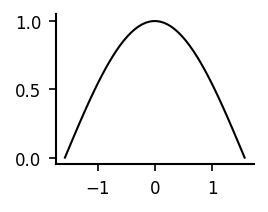

In [18]:
import numpy as np
x = np.linspace(-np.pi/2., np.pi/2.)
pt.plot(x, np.cos(x))

## Grating Stimuli

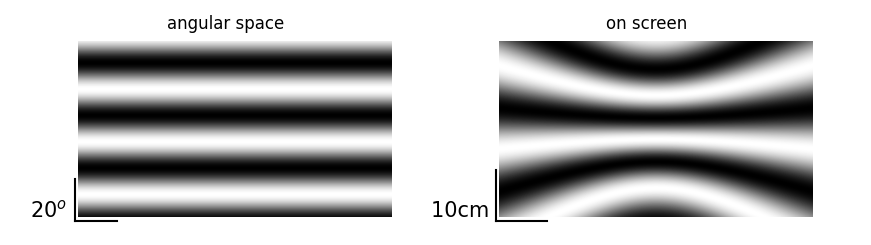

In [10]:
params = get_default_params('center-grating')
params['no-window'], params['demo'] = True, False

# a full-field grating (100deg => radius > screen-size)
for key, val in zip(['radius', 'x-center', 'y-center', 'angle'],
                    [100, 0, 0, 0]):
    params['%s-2' %key ] = val

Stim = physion.visual_stim.stimuli.center_grating.stim(params, units='deg')
Stim2 = physion.visual_stim.stimuli.center_grating.stim(params, units='cm')

fig, AX = pt.figure(axes=(2,1), figsize=(1.8,2), wspace=0, left=0, right=0)
AX[0].set_title('angular space')
AX[1].set_title('on screen')
Stim.plot_stim_picture(0, ax=AX[0])
Stim2.plot_stim_picture(0, ax=AX[1])

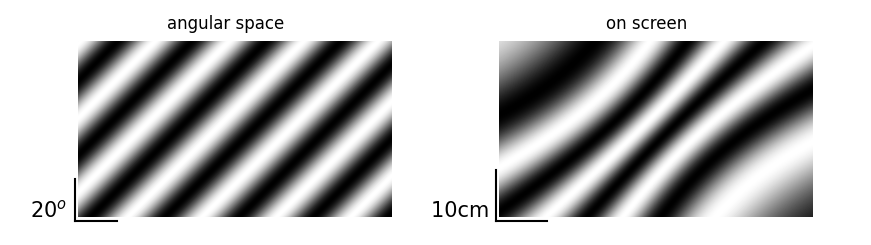

In [14]:
params = get_default_params('center-grating')
params['no-window'], params['demo'] = True, False

# a full-field grating (100deg => radius > screen-size)
for key, val in zip(['radius', 'x-center', 'y-center', 'angle'],
                    [100, 0, 0, -45]):
    params['%s-2' %key ] = val

Stim = physion.visual_stim.stimuli.center_grating.stim(params, units='deg')
Stim2 = physion.visual_stim.stimuli.center_grating.stim(params, units='cm')

fig, AX = pt.figure(axes=(2,1), figsize=(1.8,2), wspace=0, left=0, right=0)
AX[0].set_title('angular space')
AX[1].set_title('on screen')
Stim.plot_stim_picture(0, ax=AX[0])
Stim2.plot_stim_picture(0, ax=AX[1])

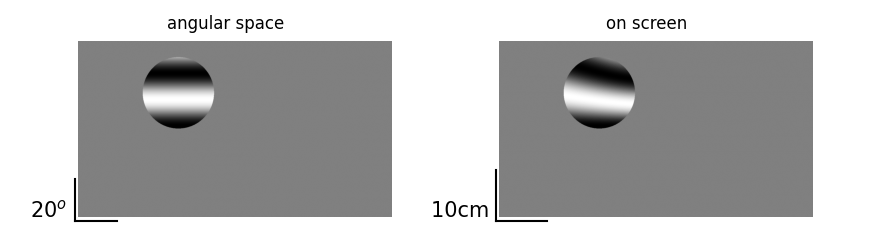

In [12]:
params = get_default_params('center-grating')
params['no-window'], params['demo'] = True, False

# a full-field grating (100deg => radius > screen-size)
for key, val in zip(['radius', 'x-center', 'y-center'],
                    [20, -30, 20]):
    params['%s-2' %key ] = val

Stim = physion.visual_stim.stimuli.center_grating.stim(params, units='deg')
Stim2 = physion.visual_stim.stimuli.center_grating.stim(params, units='cm')

fig, AX = pt.figure(axes=(2,1), figsize=(1.8,2), wspace=0, left=0, right=0)
AX[0].set_title('angular space')
AX[1].set_title('on screen')
Stim.plot_stim_picture(0, ax=AX[0])
Stim2.plot_stim_picture(0, ax=AX[1])

## 1) Properties

In [1]:
"""
Screen Dimension and Screen Placement Parameters for the Visual Stimulation
"""
screen_width = 48. # cm
screen_height = 27. # cm
distance_from_eye = 15. # cm

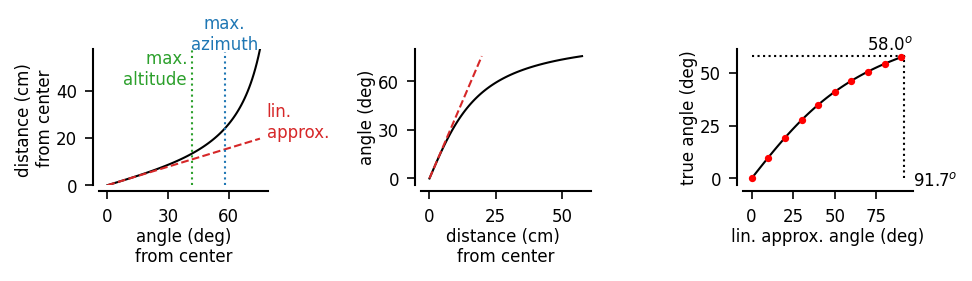

In [2]:
import sys
sys.path.append('../src')
from physion.utils import plot_tools as pt
import matplotlib.pylab as plt
import numpy as np

"""
Functions implementing basic trigonometric calculations
"""

def cm_to_angle(distance,
                distance_from_eye=15.):
    # distance_from_eye in cm
    return 180./np.pi*np.arctan(distance/distance_from_eye)

def cm_to_angle_lin(distance, distance_from_eye=15.):
    # the derivative of arctan in 0 is 1
    return distance/distance_from_eye*180./np.pi
    #return cm_to_angle(1, distance_from_eye=distance_from_eye)*distance

def angle_to_cm(angle,
                distance_from_eye=15.):
    # distance_from_eye in cm
    return distance_from_eye*np.tan(np.pi*angle/180.)

"""
plot
"""

max_height = cm_to_angle(screen_height/2.)
max_width = cm_to_angle(screen_width/2.)

angles = np.linspace(0, 1.3*max_width, 100) #
positions = angle_to_cm(angles, distance_from_eye=distance_from_eye)

fig, [ax, ax2, ax3] = plt.subplots(1, 3, figsize=(7,1.2))
plt.subplots_adjust(wspace=0.9)
ax.plot(angles, positions, color='k')
pt.plot(angles, angle_to_cm(1)*angles, ls='--', ax=ax, no_set=True, color='tab:red')
ax.annotate('lin.\napprox.', (0.99,0.35), color='tab:red', xycoords='axes fraction')

ax2.plot(positions, angles, color='k')
pt.plot(angle_to_cm(1)*angles, angles, ls='--', ax=ax2, no_set=True, color='tab:red')

ax.plot(np.ones(2)*max_height, [0,positions.max()], ':', color='tab:green', lw=1)
ax.annotate('max. \naltitude ', (max_height,positions.max()), color='tab:green', xycoords='data', va='top', ha='right')

ax.plot(np.ones(2)*max_width, [0,.98*positions.max()], ':', color='tab:blue', lw=1)
ax.annotate('max.\nazimuth', (max_width, positions.max()), color='tab:blue', xycoords='data', ha='center')

pt.set_plot(ax, 
            ylabel='distance (cm) \nfrom center',
            xlabel='angle (deg)\nfrom center',
            ylim=[0,positions.max()])
pt.set_plot(ax2, 
            xlabel='distance (cm) \nfrom center',
            ylabel='angle (deg)')

x = np.linspace(0, screen_width/2.)
ax3.plot(cm_to_angle_lin(x), cm_to_angle(x), 'k-')
ax3.plot(np.ones(2)*cm_to_angle_lin(x[-1]), [0,cm_to_angle(x[-1])], 'k:', lw=1)
ax3.plot([0,cm_to_angle_lin(x[-1])], np.ones(2)*cm_to_angle(x[-1]), 'k:', lw=1)
ax3.annotate('%.1f$^{o}$' % cm_to_angle_lin(x[-1]),
             (1, 0), xycoords='axes fraction')
ax3.annotate('%.1f$^{o}$' % cm_to_angle(x[-1]),
             (1, 1), xycoords='axes fraction', ha='right')

def angle_lin_to_true_angle(angle):
    return 180./np.pi*np.arctan(angle/180.*np.pi)

x = np.linspace(0, 90, 10)
ax3.plot(x, angle_lin_to_true_angle(x), 'ro')

pt.set_plot(ax3, 
            xlabel='lin. approx. angle (deg)',
            ylabel='true angle (deg)',
            num_xticks=5)

#ge.save_on_desktop(fig)

### Plotting the screen with its angle scales:

Text(0.5, 1.0, 'screen coordinates')

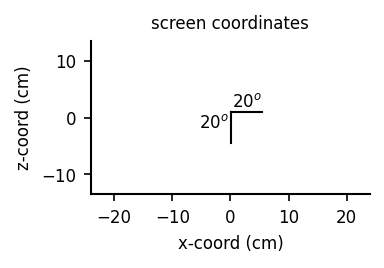

In [3]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(screen_width/20.,screen_height/20.))
pt.draw_bar_scales(ax, Ybar=angle_to_cm(20), Xbar=angle_to_cm(20), Xbar_label='20$^o$', Ybar_label='20$^o$')
ax.set_xlim(np.arange(-1,3,2)*screen_width/2.)
ax.set_ylim(np.arange(-1,3,2)*screen_height/2.)
ax.set_xlabel('x-coord (cm)')
ax.set_ylabel('z-coord (cm)')
ax.set_title('screen coordinates')
#ge.save_on_desktop(fig)

### Screen Dimensions in terms of Angles:

In [4]:
print('visual field covered:')
print('azimuth:', cm_to_angle(screen_width/2.))
print('altitude:', cm_to_angle(screen_height/2.))

visual field covered:
azimuth: 57.9946167919165
altitude: 41.98721249581666


## 2) Plotting Visual Stimuli for Figures

0.1432391503683066


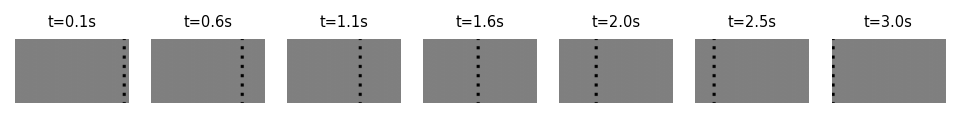

In [5]:
# start from a simple protocol to load all required data
import json, os, sys
import numpy as np
import matplotlib.pylab as plt
with open(os.path.join('..', 'src', 'physion', 
                       'acquisition', 'protocols', 'demo', 
                       'moving-dots.json')) as j:
    protocol = json.load(j)
    
sys.path.append('../src')
from physion.visual_stim.build import build_stim
from physion.visual_stim.main import init_bg_image
protocol['no-window'] = True
stim = build_stim(protocol)

stim_index = 0
times = np.linspace(0.1, 3, 7)
fig, AX = plt.subplots(1, len(times), figsize=(8,1.2))

for i, t in enumerate(times):
    AX[i].imshow(-stim.get_image(stim_index, time_from_episode_start=t).T,
                 vmin=-1, vmax=1, cmap=plt.cm.binary)
    AX[i].set_title('t=%.1fs' % t, fontsize=7)
    AX[i].axis('off')

## 3) Design of New Visual Stimuli

In [6]:
# start from a simple protocol to load all required data
import json, os
with open(os.path.join('..', 'src', 'physion', 'acquisition', 'protocols',
                       'demo', 'uniform-bg.json')) as j:
    protocol = json.load(j)
    
from physion.visual_stim.build import build_stim #, init_bg_image
from physion.visual_stim.main import init_bg_image
protocol['no-window'] = True
stim = build_stim(protocol)

0.1432391503683066


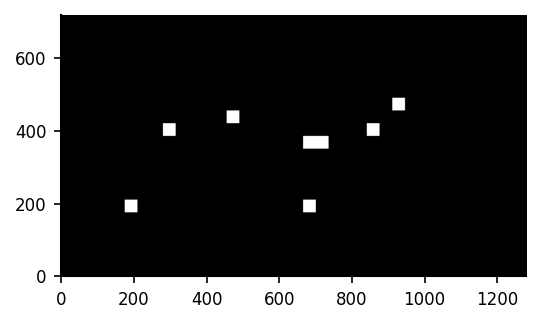

In [7]:
def compute_new_image_with_dots(self, index, dot_size, Ndots,
                                away_from_edges_factor=4):
    dot_size_pix = int(np.round(self.angle_to_pix(dot_size),0))
    Nx = int(self.x.shape[0]/dot_size_pix)
    Nz = int(self.x.shape[1]/dot_size_pix)
    dots = []
    img = init_bg_image(self, index)
    for n in range(Ndots):
        ix, iz = (np.random.choice(np.arange(away_from_edges_factor, Nx-away_from_edges_factor),1)[0],
                  np.random.choice(range(away_from_edges_factor,Nz-away_from_edges_factor),1)[0])
        img[dot_size_pix*ix:dot_size_pix*(ix+1),
            dot_size_pix*iz:dot_size_pix*(iz+1)] = 1
    return img
        
img = compute_new_image_with_dots(stim, 0, 5, 8)
fig, ax = plt.subplots(1, figsize=(4,4))
ax.imshow(img.T, origin='lower', cmap=plt.cm.gray)
#ax.axis('off')

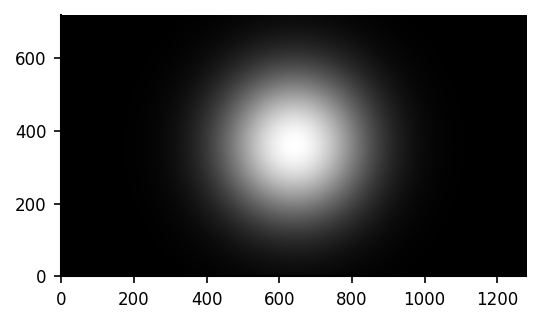

In [8]:
fig, ax = plt.subplots(1, figsize=(4,4))
radius = 20
img = init_bg_image(stim, 0)
img += np.exp(-(stim.x**2+stim.z**2)/2/radius**2)
ax.imshow(img.T, origin='lower', cmap=plt.cm.gray)
#ax.axis('off')